# Goals 2
## Given some trade data over time, can we predict future trade numbers, per country and per species?

This notebook is a little more traditional data science, we'll look at the trade data and see what we can learn from it. Finally, we'll use linear regression to see if we can predict future trade numbers for a country and for a species...



Sankey diagram for a country, showing flow of trade
Top exporting countries
top exported species
logistic regression on total exports/imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

### About the dataset

The data available it quite a lot and may kill the website when downloading it, so we'll limit ourselves initially to looking at data from 1975 - 2017 where UK is the exporting country.

In [2]:
dataframe = pd.read_csv("data/goal_2_data.csv", skipinitialspace=True, dtype={
    'Importer reported quantity': float,
    'Exporter reported quantity': float
})

dataframe

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,1975,I,Equus przewalskii,Mammalia,Perissodactyla,Equidae,Equus,SE,GB,NaN,2.0,NaN,live,NaN,Z,C
1,1975,I,Panthera onca,Mammalia,Carnivora,Felidae,Panthera,CA,GB,CA,6.0,NaN,skins,NaN,NaN,NaN
2,1975,I,Varanus flavescens,Reptilia,Sauria,Varanidae,Varanus,CH,GB,XX,5442.0,NaN,skins,NaN,NaN,NaN
3,1975,I,Varanus griseus,Reptilia,Sauria,Varanidae,Varanus,CH,GB,NaN,1228.0,NaN,skins,NaN,NaN,NaN
4,1975,II,Branta ruficollis,Aves,Anseriformes,Anatidae,Branta,CH,GB,NaN,2.0,NaN,live,NaN,P,C
5,1975,II,Leopardus pardalis,Mammalia,Carnivora,Felidae,Leopardus,CA,GB,CA,273.0,NaN,skins,NaN,NaN,NaN
6,1975,II,Leopardus wiedii,Mammalia,Carnivora,Felidae,Leopardus,CA,GB,CA,551.0,NaN,skins,NaN,NaN,NaN
7,1975,II,Diceros bicornis,Mammalia,Perissodactyla,Rhinocerotidae,Diceros,CH,GB,NaN,1.0,NaN,trophies,NaN,NaN,NaN
8,1976,I,Asarcornis scutulata,Aves,Anseriformes,Anatidae,Asarcornis,US,GB,XX,NaN,2.00000,live,NaN,NaN,NaN
9,1976,I,Branta sandvicensis,Aves,Anseriformes,Anatidae,Branta,AT,GB,NaN,NaN,2.00000,live,NaN,NaN,C


### Formatting

We'll run our standard formatting like we did on the previous notebook. We'll strip trailing spaces from the column names, and replace any NaN values with 0 in the quantities columns

In [3]:
dataframe.columns = dataframe.columns.str.strip() # Strip trailing spaces from column names
dataframe['Importer reported quantity'].fillna(0, inplace=True) # Replace NaN values with 0 for quantity
dataframe['Exporter reported quantity'].fillna(0, inplace=True) 

dataframe

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,1975,I,Equus przewalskii,Mammalia,Perissodactyla,Equidae,Equus,SE,GB,NaN,2.0,0.00000,live,NaN,Z,C
1,1975,I,Panthera onca,Mammalia,Carnivora,Felidae,Panthera,CA,GB,CA,6.0,0.00000,skins,NaN,NaN,NaN
2,1975,I,Varanus flavescens,Reptilia,Sauria,Varanidae,Varanus,CH,GB,XX,5442.0,0.00000,skins,NaN,NaN,NaN
3,1975,I,Varanus griseus,Reptilia,Sauria,Varanidae,Varanus,CH,GB,NaN,1228.0,0.00000,skins,NaN,NaN,NaN
4,1975,II,Branta ruficollis,Aves,Anseriformes,Anatidae,Branta,CH,GB,NaN,2.0,0.00000,live,NaN,P,C
5,1975,II,Leopardus pardalis,Mammalia,Carnivora,Felidae,Leopardus,CA,GB,CA,273.0,0.00000,skins,NaN,NaN,NaN
6,1975,II,Leopardus wiedii,Mammalia,Carnivora,Felidae,Leopardus,CA,GB,CA,551.0,0.00000,skins,NaN,NaN,NaN
7,1975,II,Diceros bicornis,Mammalia,Perissodactyla,Rhinocerotidae,Diceros,CH,GB,NaN,1.0,0.00000,trophies,NaN,NaN,NaN
8,1976,I,Asarcornis scutulata,Aves,Anseriformes,Anatidae,Asarcornis,US,GB,XX,0.0,2.00000,live,NaN,NaN,NaN
9,1976,I,Branta sandvicensis,Aves,Anseriformes,Anatidae,Branta,AT,GB,NaN,0.0,2.00000,live,NaN,NaN,C


### Most Exported Species

In [4]:
class_distribution = dataframe['Class'].value_counts()
class_distribution

Mammalia          15926
Reptilia          12869
Aves              11306
Anthozoa            597
Actinopteri         449
Hirudinoidea        288
Bivalvia            139
Insecta              98
Amphibia             90
Gastropoda           62
Elasmobranchii       48
Arachnida            45
Hydrozoa             12
Dipneusti             1
Name: Class, dtype: int64

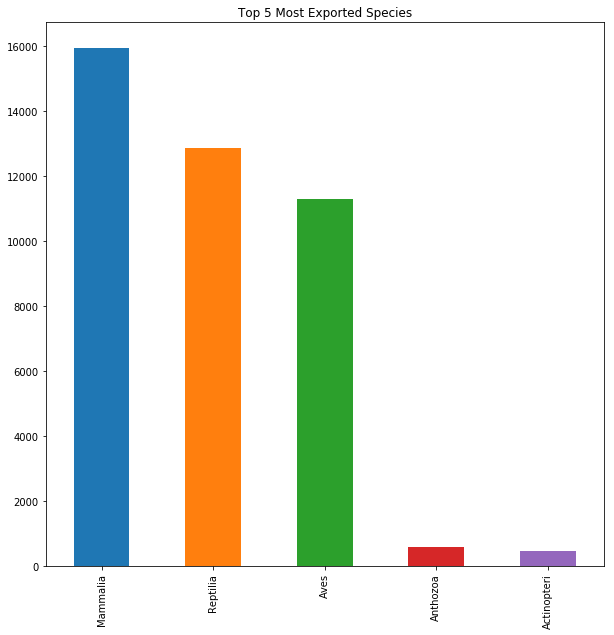

In [5]:
class_distribution.head(5).plot.bar(figsize=(10, 10), title="Top 5 Most Exported Species")

### Most Exported to Countries

In [6]:
importer_distribution = dataframe['Importer'].value_counts()
importer_distribution.head(10)

US    15000
JP     4264
CH     2488
CA     2062
GB     1850
AU     1503
AE     1194
XX     1186
ZA     1136
CN     1020
Name: Importer, dtype: int64

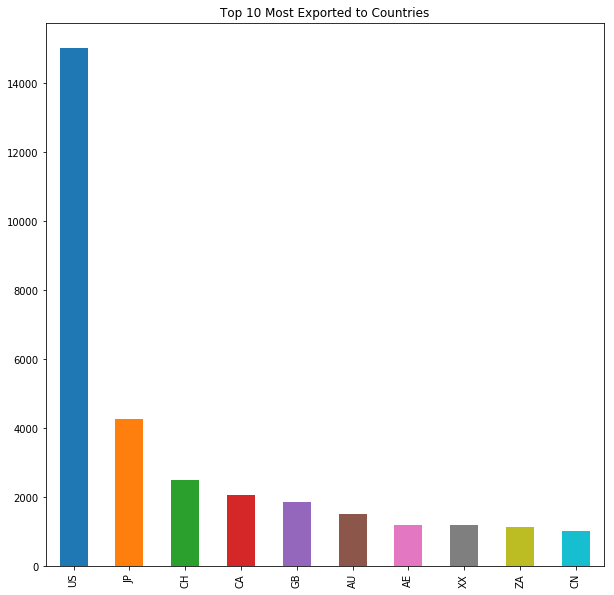

In [7]:
importer_distribution.head(10).plot.bar(figsize=(10, 10), title="Top 10 Most Exported to Countries")

In [28]:
purpose_distribution = dataframe['Purpose'].value_counts()
purpose_distribution

T    24978
P     7356
B     2236
S     1992
Z     1561
Q     1072
M      963
E      584
H      132
N       59
G       54
L       51
Name: Purpose, dtype: int64

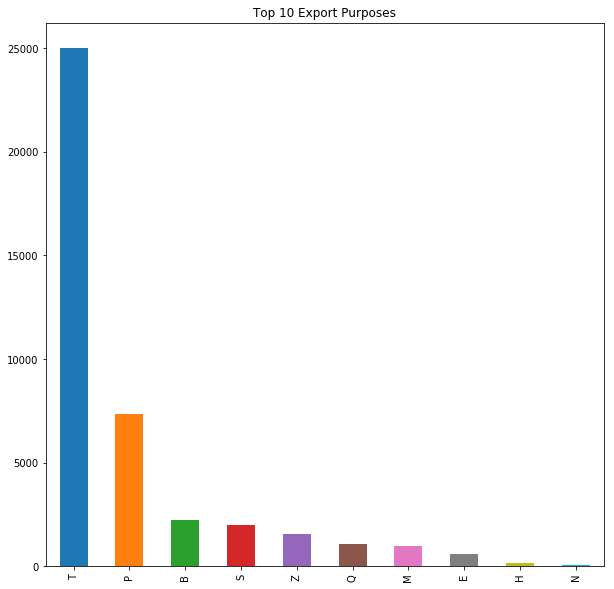

In [30]:
purpose_distribution.head(10).plot.bar(figsize=(10, 10), title="Top 10 Export Purposes")

In [9]:
### Sankey Top 5 exports and their reason breakdown

In [10]:
### Sankey flow of exports in one year (country to country)

### Linear regression of total trade over time

In [11]:
year_distribution = dataframe['Year'].value_counts().reset_index()
year_distribution.columns = ["Year", "Count"]

year_distribution

,Year,Count
0,1988,1576
1,2000,1555
2,1981,1484
3,2013,1479
4,1998,1477
5,1999,1458
6,1993,1441
7,2012,1423
8,2009,1408
9,2005,1405


Our data needs a little further formatting. We'll need to order it by year...

In [12]:
year_distribution = year_distribution.sort_values(by=['Year'])
year_distribution = year_distribution[1:-1].reset_index()
year_distribution = year_distribution.drop(columns=["index"])
year_distribution

,Year,Count
0,1976,431
1,1977,891
2,1978,823
3,1979,1000
4,1980,1090
5,1981,1484
6,1982,1213
7,1983,1032
8,1984,895
9,1985,996


Let's take a look at the data on a scatter plot, we should be  

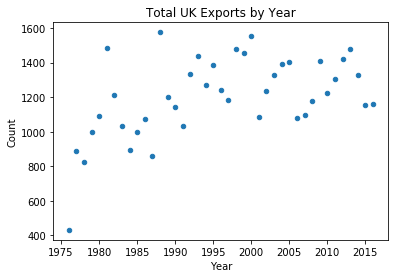

In [13]:
year_distribution.plot.scatter(x="Year", y="Count", title="Total UK Exports by Year")

In [14]:
year  = year_distribution["Year"].values.reshape(-1, 1)
count = year_distribution["Count"].values.reshape(-1, 1).ravel()

In [23]:
model = linear_model.LinearRegression()
model.fit(year, count)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
count_pred = model.predict(year)

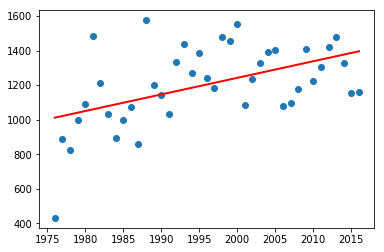

In [25]:
plt.scatter(year, count)
plt.plot(year, count_pred, color='red', linewidth=2)

plt.show()

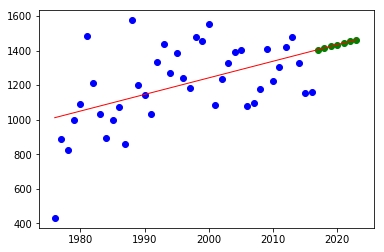

In [26]:
future_years = np.array([[2017], [2018], [2019], [2020], [2021], [2022], [2023]])
future_counts = model.predict(future_years)

years = np.concatenate((year, future_years))
counts_pred = model.predict(years)

plt.scatter(year, count, color="blue")
plt.scatter(future_years, future_counts, color="green")
plt.plot(years, counts_pred, color='red', linewidth=1)

plt.show()